## Importa as Bibliotacas e Database

In [1]:
# Chama as bibliotecas
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as ptl

# Carrega a base de dados
data = pd.read_csv("CTG.csv")

# Eliminando colunas que não serão utilizadas
data = data.drop(data.columns[0], axis=1)

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,1


## Cria o Data Frame

In [2]:
df_data = pd.DataFrame(data)
df_data = df_data.drop(columns=["NSP"])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

# Separa o Dataframe para Treino, Teste e Validação

In [3]:
from sklearn.model_selection import train_test_split

# Separa os dados em treino, teste e validação
x_train, x_temp, y_train, y_temp = train_test_split(df_data, data["NSP"], test_size=0.5, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Encontra o Melhor Modelo

In [6]:
from sklearn.svm import SVC

score = []
model_name = []
highest = -1

# Criando e testando os modelol
for i in('linear', 'poly', 'rbf', 'sigmoid'):
    for j in (0.1, 1, 10):
        SVM = SVC(kernel=i, C=j)
        SVM.fit(x_train, y_train)
        pred = SVM.predict(x_validation)
        acc = sk.metrics.accuracy_score(y_validation, pred)
        
        # Salva o melhor modelo
        if acc > highest:
            name = "SVM " + i + " " + str(j)
            best_kernel = i
            best_c = j
            highest = acc
    
        # Salva o score dos modelos
        score.append(acc)
        model_name.append("SVM " + i + " " + str(j))
        


SVM linear 0.1 accuracy: 0.8775894538606404
SVM linear 1 accuracy: 0.8832391713747646
SVM linear 10 accuracy: 0.8907721280602636
SVM poly 0.1 accuracy: 0.7966101694915254
SVM poly 1 accuracy: 0.8549905838041432
SVM poly 10 accuracy: 0.8625235404896422
SVM rbf 0.1 accuracy: 0.7871939736346516
SVM rbf 1 accuracy: 0.8418079096045198
SVM rbf 10 accuracy: 0.8700564971751412
SVM sigmoid 0.1 accuracy: 0.7871939736346516
SVM sigmoid 1 accuracy: 0.7871939736346516
SVM sigmoid 10 accuracy: 0.7457627118644068


## Plota a Acuracia de Cada Modelo

Name: SVM linear 10  Score: 0.8907721280602636


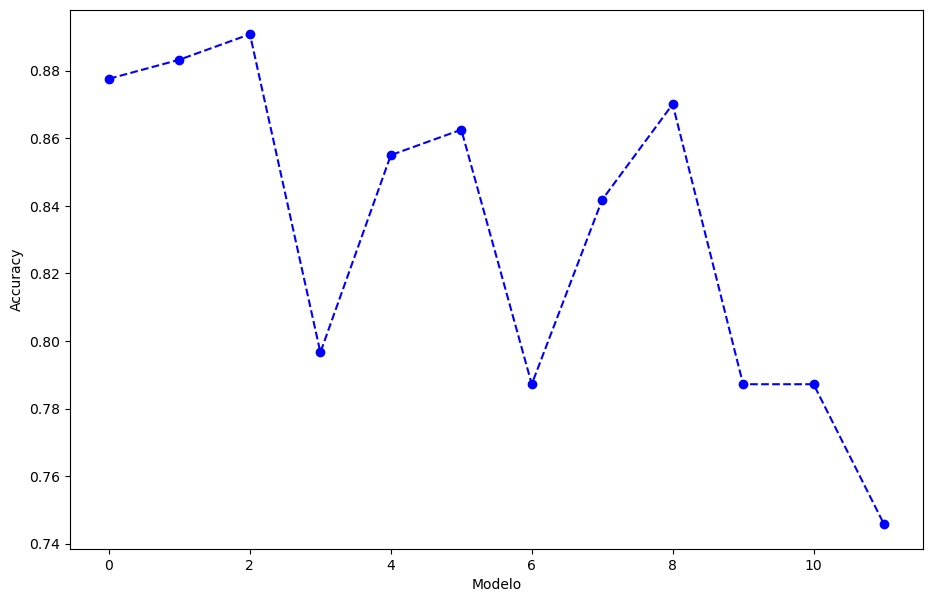

In [7]:
# Grafio do score de cada modelo
ptl.figure(figsize=(11,7))
ptl.plot(range(len(model_name)), score, color='blue', linestyle='dashed', marker='o')
ptl.xlabel('Modelo')
ptl.ylabel('Accuracy')

# Mostra a melhor configuração
print("Name:", name, " Score:", highest)